# Transpiling and Optimizing a Quantum Circuit with Qiskit

This example demonstrates how to **transpile** and **optimize** a basic quantum circuit using Qiskit and a simulated backend (`FakeYorktown`). Transpilation is a key step in preparing a quantum circuit for execution on real quantum hardware, where connectivity and gate sets are limited.

## What Is Transpilation?

Transpilation is the process of converting a user defined quantum circuit into a form that can be run efficiently on a specific quantum device. It involves:
- Unrolling gates into the device’s supported basis gates
- Mapping qubits from logical to physical qubit layout
- Optimizing gate sequences to reduce circuit depth and error rates

## Circuit Description

The original circuit in this example:
- Creates a Bell state using `H` and `CNOT`
- Applies a `Z` gate on one qubit
- Measures both qubits

## Backend Simulation

We use `FakeYorktown`, a simulator mimicking a real 5-qubit IBM device, to demonstrate how Qiskit transpiles the circuit to fit hardware constraints.

## Optimization Level

The `optimization_level=3` argument in `transpile()` applies an aggressive set of optimizations, including:
- Gate cancellation
- SWAP insertion to meet topology requirements
- Reordering of gates to reduce circuit depth

## Output

The script prints both the original and the transpiled circuit diagrams so you can compare the transformations Qiskit applies.


In [1]:
# Import necessary Qiskit modules
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeYorktown  # A simulated IBM quantum device backend

# Step 1: Create a simple 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Apply a Hadamard gate to qubit 0 to create superposition
qc.h(0)

# Apply a CNOT gate between qubit 0 (control) and qubit 1 (target) to entangle them
qc.cx(0, 1)

# Insert a barrier (for visualization clarity)
qc.barrier()

# Apply a Z gate to qubit 1
qc.z(1)

# Add measurement to both qubits
qc.measure_all()

# Print the original circuit diagram
print("Original circuit:")
print(qc.draw())

# Step 2: Choose a fake backend to simulate real IBM hardware
# FakeYorktown represents a real device's connectivity and gate set
backend = FakeYorktown()

# Step 3: Transpile the circuit for the target backend using optimization_level=3
# This performs layout selection, gate decomposition, and optimization
transpiled_qc = transpile(qc, backend=backend, optimization_level=3)

# Print the transpiled (optimized and hardware-aware) circuit
print("\n Transpiled circuit (optimization_level=3):")
print(transpiled_qc.draw())


Original circuit:
        ┌───┐      ░       ░ ┌─┐   
   q_0: ┤ H ├──■───░───────░─┤M├───
        └───┘┌─┴─┐ ░ ┌───┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░─┤ Z ├─░──╫─┤M├
             └───┘ ░ └───┘ ░  ║ └╥┘
meas: 2/══════════════════════╩══╩═
                              0  1 

 Transpiled circuit (optimization_level=3):
global phase: 3π/4
                                           ┌───┐ ░ ┌───────┐ ░    ┌─┐
      q_1 -> 0 ────────────────────────────┤ X ├─░─┤ Rz(π) ├─░────┤M├
               ┌─────────┐┌────┐┌─────────┐└─┬─┘ ░ └───────┘ ░ ┌─┐└╥┘
      q_0 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░───────────░─┤M├─╫─
               └─────────┘└────┘└─────────┘      ░           ░ └╥┘ ║ 
ancilla_0 -> 2 ─────────────────────────────────────────────────╫──╫─
                                                                ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────────────────╫──╫─
                                                                ║  ║ 
ancilla_2 -> 4 ─────────────────────

/var/folders/1b/_h4_txrn1m77yhswwghpq9h40000gn/T/ipykernel_54178/1400536517.py:29: DeprecationWarning: All fake backend instances based on real device snapshots (`FakeVigo`,`FakeSherbrooke`,...) have been migrated to the `qiskit_ibm_runtime` package. These classes are deprecated as of qiskit 0.46.0 and will be removed in qiskit 1.0.0. To migrate your code, run `pip install qiskit-ibm-runtime` and use `from qiskit_ibm_runtime.fake_provider import FakeExample` instead of `from qiskit.providers.fake_provider import FakeExample`. If you are using a custom fake backend implementation, you don't need to take any action.
  backend = FakeYorktown()
/opt/homebrew/Caskroom/miniconda/base/envs/qiskit-clean/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/Caskroom/miniconda/base/envs/qiskit-clean/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid v

# Layout Method Comparison in Qiskit: Trivial vs Sabre

This example demonstrates how the **choice of layout method** affects the transpilation of a quantum circuit when preparing it for execution on real hardware. We compare the results of transpiling the same circuit using:

- `Trivial` Layout
- `Sabre` Layout

## What Is a Layout in Qiskit?

When you transpile a circuit, Qiskit needs to map **logical qubits** (defined in your circuit) to **physical qubits** on a real device. This process is called **layout selection**, and it’s crucial for performance and fidelity.

Different layout strategies can significantly affect:

- The number of added SWAP gates
- Circuit depth and error rates
- Overall hardware compatibility

## Purpose of This Code

This code compares two layout strategies:
- `Trivial Layout`: Maps qubit 0 → 0, 1 → 1, 2 → 2 directly. It’s simple but may not match the device's connectivity well.
- `Sabre Layout`: Dynamically chooses the best physical qubits to reduce gate count and improve efficiency.

## Circuit Description

We create a simple 3-qubit entanglement circuit:

This circuit is then transpiled twice:
1. With `layout_method='trivial'`
2. With `layout_method='sabre'`

Both are targeted to the `FakeManila` backend, which simulates a real IBM 5-qubit device.


In [2]:
# Import core Qiskit modules
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeManila  # Simulates an actual IBM 5-qubit device

# Step 1: Create a simple quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Apply a Hadamard gate to qubit 0 to create superposition
qc.h(0)

# Apply two CNOT gates to entangle the qubits: 0→1 and then 1→2
qc.cx(0, 1)
qc.cx(1, 2)

# Measure all qubits at the end
qc.measure_all()

# Print the original circuit diagram
print("Original Circuit:")
print(qc.draw())

# Step 2: Select a fake backend to simulate real hardware constraints (limited qubit connectivity)
backend = FakeManila()

# Step 3: Transpile the circuit using 'trivial' layout
# This layout maps logical qubits 0, 1, 2 directly to physical qubits 0, 1, 2
# It may introduce SWAP gates if these qubits are not fully connected on hardware
qc_trivial = transpile(qc, backend=backend, layout_method='trivial', optimization_level=3)

print("\n Transpiled with Trivial Layout:")
print(qc_trivial.draw())

# Step 4: Transpile the same circuit using 'sabre' layout
# This layout tries to minimize the number of SWAPs and optimize for better connectivity
qc_sabre = transpile(qc, backend=backend, layout_method='sabre', optimization_level=3)

print("\nTranspiled with Sabre Layout:")
print(qc_sabre.draw())

# Optional: Print the gate counts for a quick performance comparison
print("\nGate counts (Trivial Layout):")
print(qc_trivial.count_ops())

print("\nGate counts (Sabre Layout):")
print(qc_sabre.count_ops())


Original Circuit:
        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 

 Transpiled with Trivial Layout:
global phase: π/4
               ┌─────────┐┌────┐┌─────────┐           ░ ┌─┐      
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────────░─┤M├──────
               └─────────┘└────┘└─────────┘┌─┴─┐      ░ └╥┘┌─┐   
      q_1 -> 1 ────────────────────────────┤ X ├──■───░──╫─┤M├───
                                           └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
      q_2 -> 2 ─────────────────────────────────┤ X ├─░──╫──╫─┤M├
                                                └───┘ ░  ║  ║ └╥┘
ancilla_0 -> 3 ──────────────────────────────────────────╫──╫──╫─
                                                         ║  ║  ║ 
ancilla_1 ->

/var/folders/1b/_h4_txrn1m77yhswwghpq9h40000gn/T/ipykernel_54178/1852597648.py:23: DeprecationWarning: All fake backend instances based on real device snapshots (`FakeVigo`,`FakeSherbrooke`,...) have been migrated to the `qiskit_ibm_runtime` package. These classes are deprecated as of qiskit 0.46.0 and will be removed in qiskit 1.0.0. To migrate your code, run `pip install qiskit-ibm-runtime` and use `from qiskit_ibm_runtime.fake_provider import FakeExample` instead of `from qiskit.providers.fake_provider import FakeExample`. If you are using a custom fake backend implementation, you don't need to take any action.
  backend = FakeManila()


# Hardware-Aware Transpilation with Qiskit

## Purpose
This notebook demonstrates *hardware-aware transpilation* in Qiskit. When running quantum circuits on real hardware, we must account for the physical limitations and topology (qubit connectivity) of quantum devices. This example shows how the same logical circuit is transformed differently depending on the hardware backend.


## Concept

- **Transpilation**: The process of converting a high-level quantum circuit into a form that can run on a specific quantum device.
- **Backend**: A representation of a quantum processor with specific constraints (like connectivity).
- **Fake Backends**: Simulated versions of real IBM quantum devices used for testing and visualization without real execution.


## How It Works

1. A 4-qubit entangled circuit is created using Hadamard and CNOT gates.
2. The circuit is transpiled for two fake hardware backends: `FakeAthens` and `FakeYorktown`.
3. Each backend has a unique **coupling map** (allowed CNOT connections).
4. Transpilation rewires and adapts the circuit to meet each backend's topology.
5. The result is visualized using:
   - `plot_circuit_layout`: shows how logical qubits are mapped to physical ones.
   - `circuit_drawer`: displays the transformed circuit.


## Why It Matters

- A circuit might look simple logically, but its physical implementation can vary dramatically depending on the backend.
- The **circuit depth** affects how much noise and decoherence it accumulates.
- Transpilation allows Qiskit to automatically optimize layout and gate structure based on device capabilities.


Try experimenting with different circuits or fake backends to see how layout and performance change!


Original Circuit:
        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■────■────■───░─┤M├─────────
        └───┘┌─┴─┐  │    │   ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──┼────┼───░──╫─┤M├──────
             └───┘┌─┴─┐  │   ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──┼───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 

Athens transpiled depth: 13


/var/folders/1b/_h4_txrn1m77yhswwghpq9h40000gn/T/ipykernel_44111/1367817051.py:30: DeprecationWarning: All fake backend instances based on real device snapshots (`FakeVigo`,`FakeSherbrooke`,...) have been migrated to the `qiskit_ibm_runtime` package. These classes are deprecated as of qiskit 0.46.0 and will be removed in qiskit 1.0.0. To migrate your code, run `pip install qiskit-ibm-runtime` and use `from qiskit_ibm_runtime.fake_provider import FakeExample` instead of `from qiskit.providers.fake_provider import FakeExample`. If you are using a custom fake backend implementation, you don't need to take any action.
  backend_athens = FakeAthens()
/var/folders/1b/_h4_txrn1m77yhswwghpq9h40000gn/T/ipykernel_44111/1367817051.py:31: DeprecationWarning: All fake backend instances based on real device snapshots (`FakeVigo`,`FakeSherbrooke`,...) have been migrated to the `qiskit_ibm_runtime` package. These classes are deprecated as of qiskit 0.46.0 and will be removed in qiskit 1.0.0. To migrat

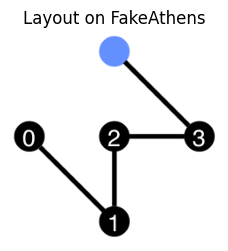

/opt/homebrew/Caskroom/miniconda/base/envs/qiskit-clean/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)



Yorktown transpiled depth: 10


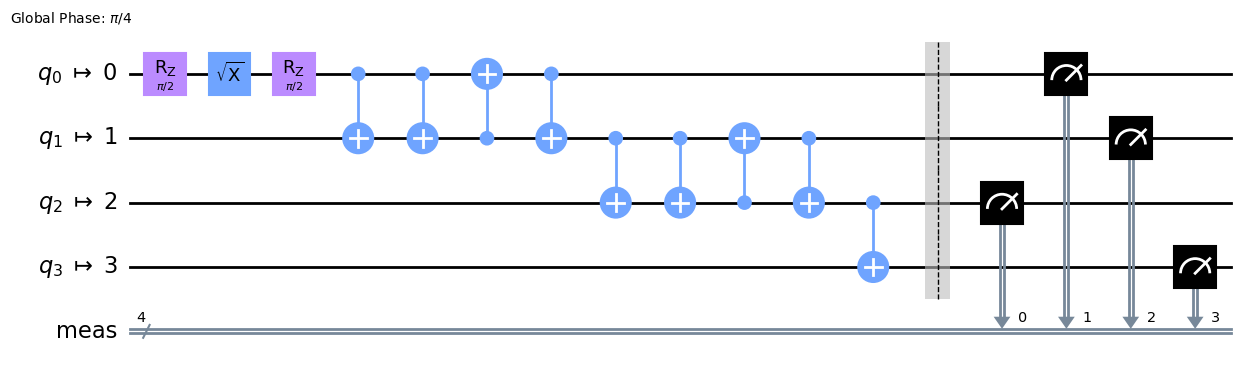

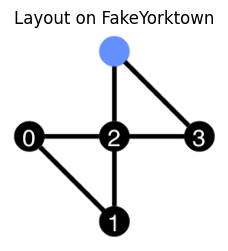

/opt/homebrew/Caskroom/miniconda/base/envs/qiskit-clean/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


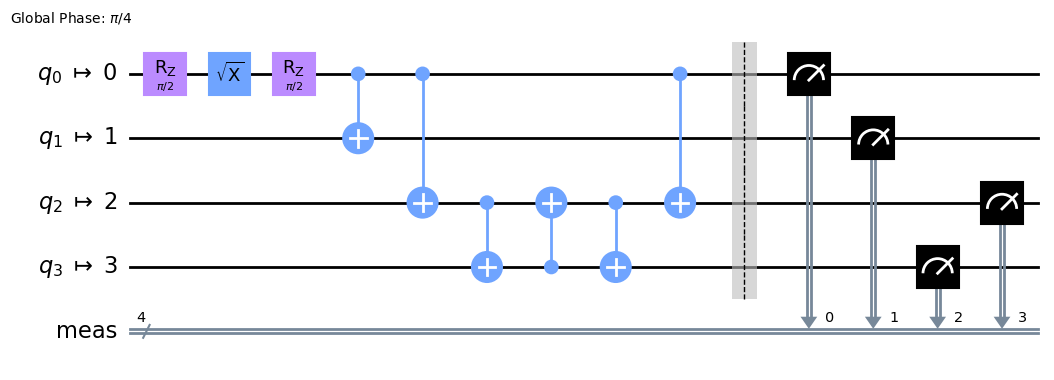

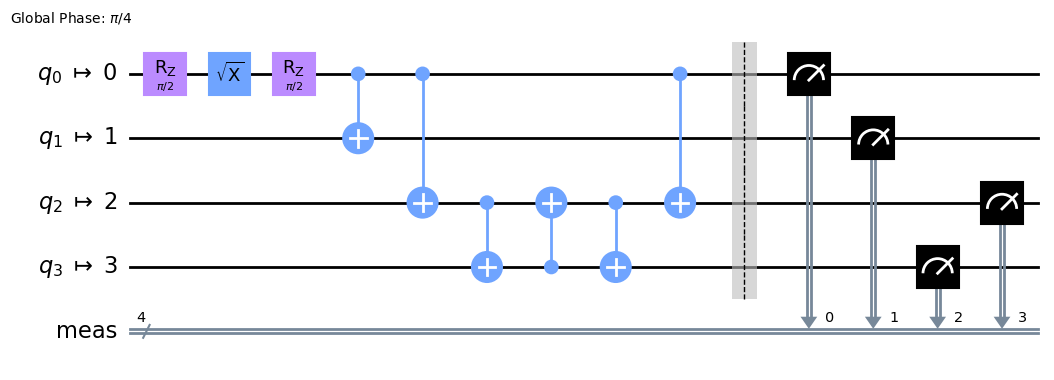

In [3]:
# Import necessary tools from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout, circuit_drawer

# Import fake backends that simulate real IBM quantum devices
from qiskit.providers.fake_provider import FakeAthens, FakeYorktown

# Import Matplotlib to display plots
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Define a quantum circuit
# ---------------------------
# This creates a 4-qubit circuit with entanglement from qubit 0 to the others
qc = QuantumCircuit(4)
qc.h(0)           # Apply Hadamard to qubit 0 to create superposition
qc.cx(0, 1)       # Entangle qubit 0 and 1
qc.cx(0, 2)       # Entangle qubit 0 and 2
qc.cx(0, 3)       # Entangle qubit 0 and 3
qc.measure_all()  # Measure all qubits at the end

# Print the original (logical) circuit before transpilation
print("Original Circuit:")
print(qc.draw())

# ---------------------------
# Step 2: Choose two fake hardware backends
# ---------------------------
# These simulate the coupling maps and constraints of real devices
backend_athens = FakeAthens()
backend_yorktown = FakeYorktown()

# ---------------------------
# Step 3: Transpile for FakeAthens (optimization_level = 0)
# ---------------------------
# This step maps the logical circuit to the physical qubits of Athens
qc_athens_0 = transpile(qc, backend=backend_athens, optimization_level=0)

# Print and visualize layout and structure
print("\nAthens transpiled depth:", qc_athens_0.depth())
plot_circuit_layout(qc_athens_0, backend=backend_athens)
plt.title("Layout on FakeAthens")
plt.show()

# Draw the full circuit with layout applied
circuit_drawer(qc_athens_0, idle_wires=False, output='mpl')

# ---------------------------
# Step 4: Transpile for FakeYorktown (optimization_level = 0)
# ---------------------------
# Do the same for Yorktown to compare its layout behavior
qc_yorktown_0 = transpile(qc, backend=backend_yorktown, optimization_level=0)

print("\nYorktown transpiled depth:", qc_yorktown_0.depth())
plot_circuit_layout(qc_yorktown_0, backend=backend_yorktown)
plt.title("Layout on FakeYorktown")
plt.show()

circuit_drawer(qc_yorktown_0, idle_wires=False, output='mpl')


# Hardware-Aware Quantum Circuit Mapping

This notebook demonstrates how to **transpile a quantum circuit for a specific quantum device** using Qiskit’s hardware-aware compilation features. 

We use a 3-qubit entangling circuit and map it to the physical qubits of an IBM Quantum backend (`ibm_sherbrooke`) while comparing two transpilation strategies:

- **Optimization Level 0:** Preserves the original structure with minimal changes.
- **Optimization Level 3:** Aggressively rewrites the circuit to reduce depth and error using backend-specific constraints.

### Key Concepts Covered
- Quantum circuit creation (Hadamard + CNOT entanglement)
- Hardware connectivity and qubit mapping
- Transpilation with different optimization levels
- Visualizing layout and depth changes after transpilation
- Introduction to backend-aware compilation

This is a foundational step in learning how to **bridge high-level quantum algorithms to real hardware constraints** such as coupling maps, error rates, and gate times.

--------------------------------------------------------------------------------------------------------------------------


/opt/homebrew/Caskroom/miniconda/base/envs/qiskit-clean/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/Caskroom/miniconda/base/envs/qiskit-clean/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


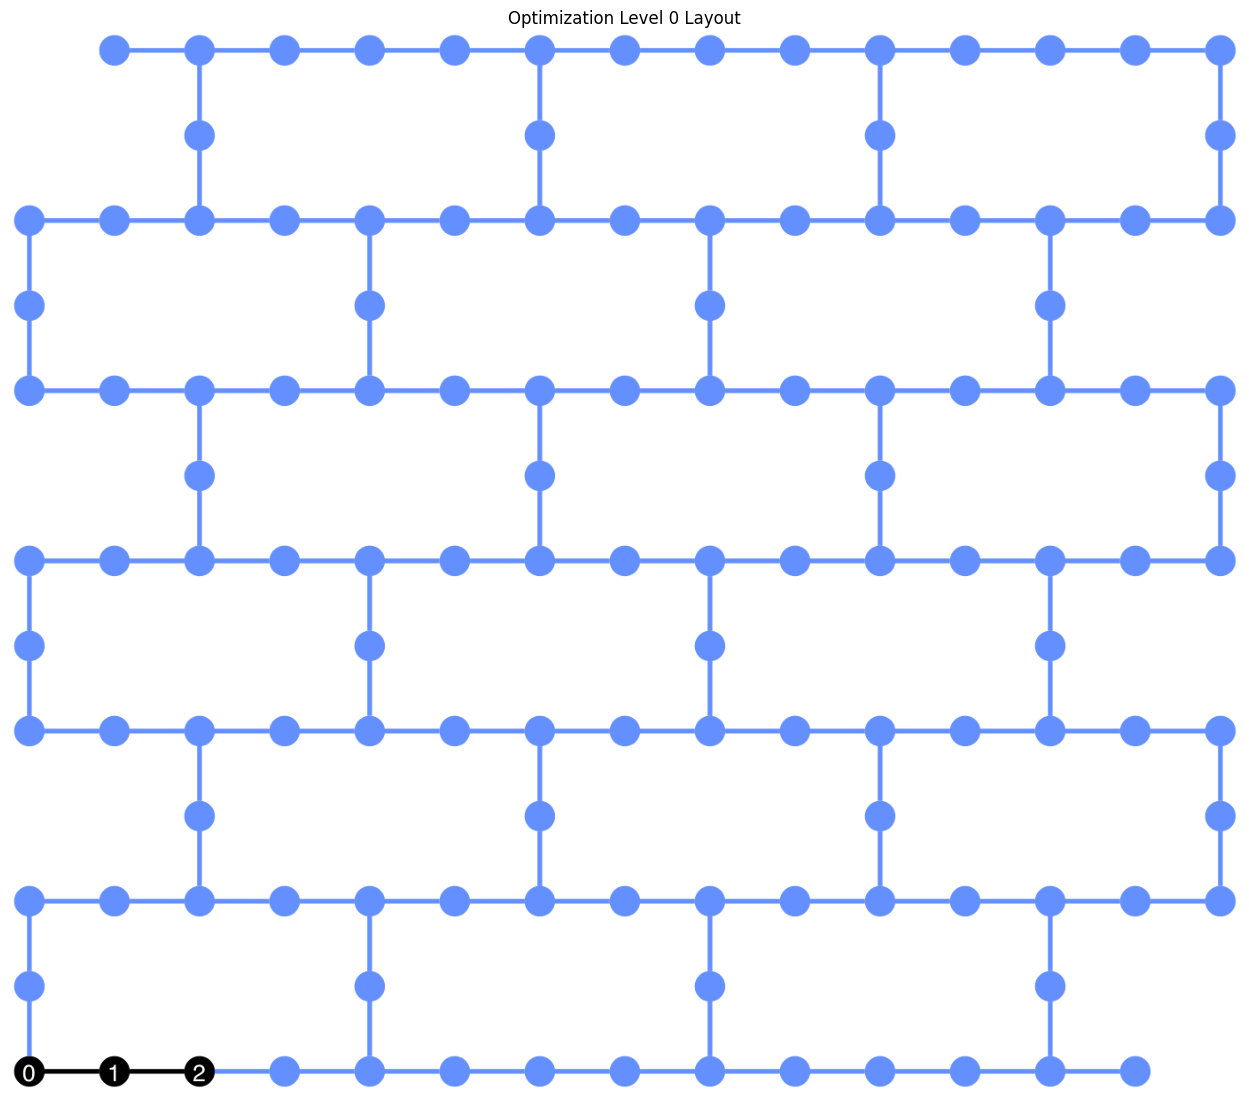

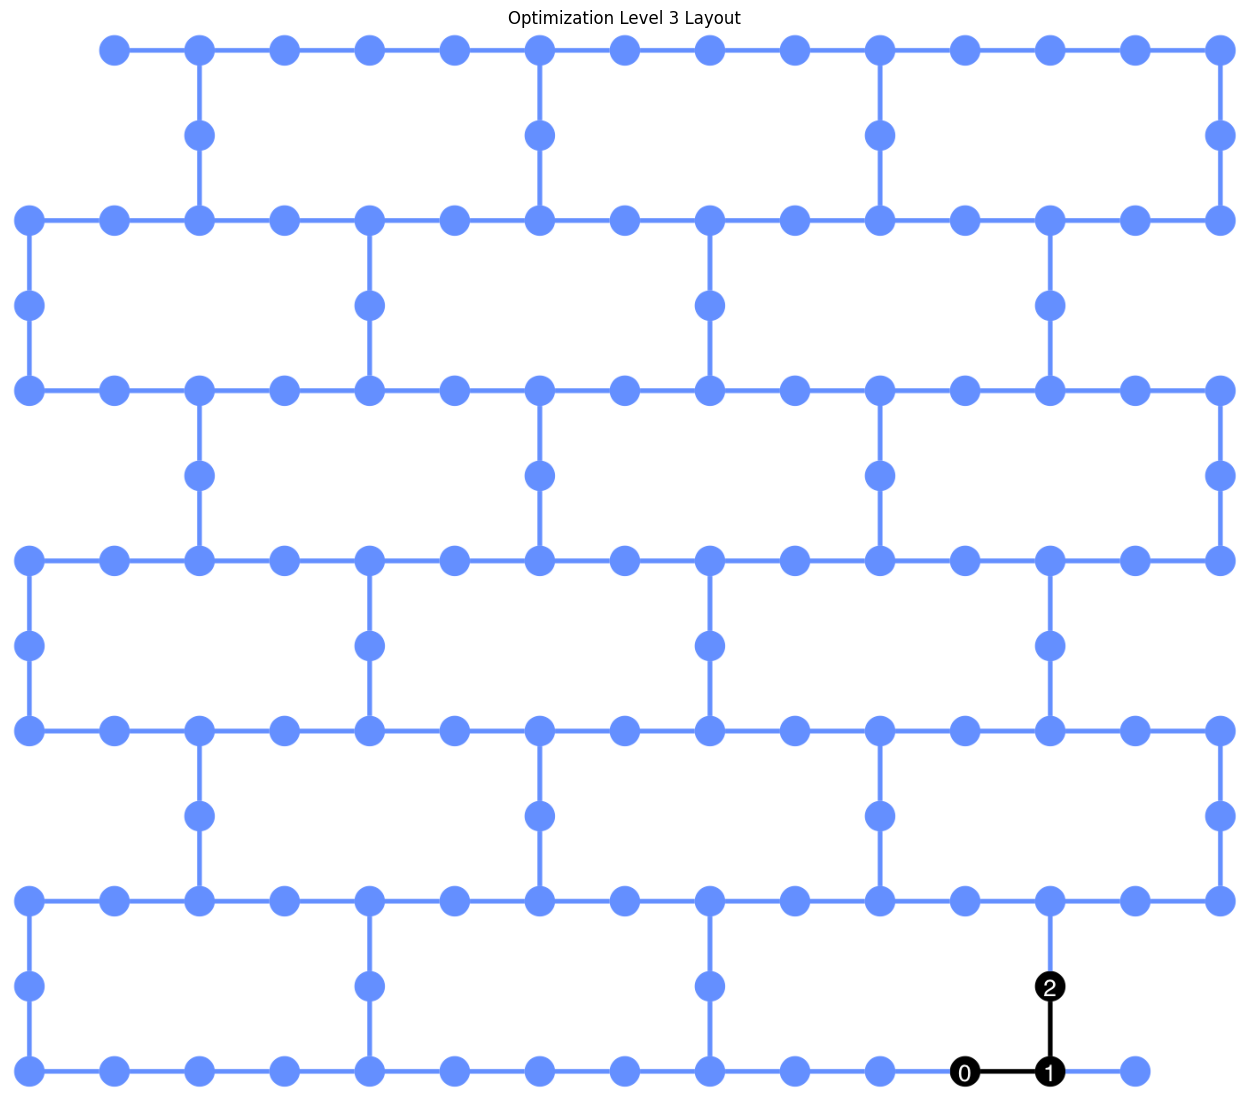

Circuit Depth (Optimization Level 0): 15
Circuit Depth (Optimization Level 3): 15
✅ IBMProvider is ready. Backends available to you:
['ibm_brisbane', 'ibm_sherbrooke']


In [1]:
# ------------------------------------------------------------------------------
# PURPOSE:
# This script demonstrates *hardware-aware transpilation* using IBM Quantum backends.
# It shows how a quantum circuit is transformed (transpiled) depending on the hardware topology.
# The example uses two transpilation optimization levels (0 and 3) and compares:
#   - Physical qubit mapping (layout)
#   - Circuit depth
# This is useful for understanding how transpilation adapts circuits to real hardware constraints.
# ------------------------------------------------------------------------------

from qiskit import QuantumCircuit, transpile          # Main Qiskit tools
from qiskit_ibm_provider import IBMProvider           # Access IBM Quantum backends
from qiskit.visualization import plot_circuit_layout  # Visualize qubit mappings
import matplotlib.pyplot as plt

%matplotlib inline 

# -------------------------------
# Step 1: Load IBM Quantum account
# -------------------------------
# This loads your IBM Quantum credentials (you should've already saved your API token).
provider = IBMProvider()

# -------------------------------
# Step 2: Choose a hardware backend
# -------------------------------
# Select a real device (you can replace "ibm_sherbrooke" with any backend you have access to).
backend = provider.get_backend("ibm_sherbrooke")

# -------------------------------
# Step 3: Define a logical circuit
# -------------------------------
# Create a 3-qubit circuit that generates entanglement across all qubits
qc = QuantumCircuit(3)
qc.h(0)         # Create superposition on qubit 0
qc.cx(0, 1)     # Entangle qubit 0 with 1
qc.cx(1, 2)     # Entangle qubit 1 with 2

# -------------------------------
# Step 4: Transpile with level 0 (no optimization)
# -------------------------------
# This preserves the original structure, only adapting for hardware topology
qc_lvl0 = transpile(qc, backend=backend, optimization_level=0)

# -------------------------------
# Step 5: Transpile with level 3 (max optimization)
# -------------------------------
# The transpiler now minimizes depth and gate count
qc_lvl3 = transpile(qc, backend=backend, optimization_level=3)

# -------------------------------
# Step 6: Visualize layout mapping
# -------------------------------
# Show how logical qubits are mapped to physical qubits

plot_circuit_layout(qc_lvl0, backend)
plt.title("Optimization Level 0 Layout")
plt.show()

plot_circuit_layout(qc_lvl3, backend)
plt.title("Optimization Level 3 Layout")
plt.show()

# -------------------------------
# Step 7: Report circuit depth
# -------------------------------
# Shorter depth typically means less decoherence and higher fidelity

print("Circuit Depth (Optimization Level 0):", qc_lvl0.depth())
print("Circuit Depth (Optimization Level 3):", qc_lvl3.depth())

# -------------------------------
# Step 8: Print accessible backends
# -------------------------------
# Optional: see which other backends you can try this on

print("IBMProvider is ready. Backends available to you:")
print([backend.name for backend in provider.backends()])


In [6]:
import numpy as np
print(np.__version__)
print(hasattr(np, "product"))
print(np.product([2, 3, 4]))

1.23.5
True
24
